In [46]:
import networkx as nx
import itertools
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from cltl.triple_extraction.api import Chat
from cltl.triple_extraction.cfg_analyzer import CFGAnalyzer
from cltl.triple_extraction.utils.helper_functions import utterance_to_capsules

In [47]:
import nltk 

nltk.download('all')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd 


# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to conduct sentiment analysis on a sentence
def analyze_sentiment(sentence):
    sentiment_scores = sia.polarity_scores(sentence)
    return sentiment_scores

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/suhaibbasir/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/suhaibbasir/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/suhaibbasir/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/suhaibbasir/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/suhaibbasir/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]

In [48]:

def extract_triples1():
    chat = Chat("Leolani", "Lenka")
    analyzer = CFGAnalyzer()

    triples = []

    while True:
        # Get user input
        user_input = input("Enter an  (or type 'exit' to quit): ")

        # Check if the user wants to exit the loop
        if user_input.lower() == 'exit':
            print("Exiting the")
            print(len(triples))
            return triples

        # Add user utterance to the chat
        chat.add_utterance(user_input)

        # Analyze utterance in context
        analyzer.analyze_in_context(chat)

        # Get capsules from the last utterance
        capsules = utterance_to_capsules(chat.last_utterance)

        # Print triples extracted from the last utterance
        # print(chat.last_utterance.triples)

        # Iterate through each triple and extract the subject, predicate, and object
        for triple in chat.last_utterance.triples:
            subject_label = triple['subject']['label'] if 'subject' in triple and 'label' in triple['subject'] else "Unknown"
            predicate_label = triple['predicate']['label'] if 'predicate' in triple and 'label' in triple['predicate'] else "Unknown"
            object_label = triple['object']['label'] if 'object' in triple and 'label' in triple['object'] else "Unknown"

            triples.append((subject_label, predicate_label, object_label))

In [49]:

def extract_triples2(text_file):
    chat = Chat("Leolani", "Lenka")
    analyzer = CFGAnalyzer()

    triples = []

    with open(text_file, 'r') as file:
        for line in file:
            # Get user input from each line in the text file
            user_input = line.strip()

            sentiment = analyze_sentiment(user_input)

            # Check if the user wants to exit the loop
            if user_input.lower() == 'exit':
                print("Exiting the")
                print(len(triples))
                return triples

            # Add user utterance to the chat
            chat.add_utterance(user_input)

            # Analyze utterance in context
            analyzer.analyze_in_context(chat)

            # Get capsules from the last utterance
            capsules = utterance_to_capsules(chat.last_utterance)

            # Print triples extracted from the last utterance
            # print(chat.last_utterance.triples)

            # Iterate through each triple and extract the subject, predicate, and object
            for triple in chat.last_utterance.triples:
                subject_label = triple['subject']['label'] if 'subject' in triple and 'label' in triple['subject'] else "Unknown"
                predicate_label = triple['predicate']['label'] if 'predicate' in triple and 'label' in triple['predicate'] else "Unknown"
                object_label = triple['object']['label'] if 'object' in triple and 'label' in triple['object'] else "Unknown"

                triples.append((subject_label, predicate_label, object_label, sentiment['compound']))

    return triples


In [50]:
text_file = "sentences.txt"
# extract triples from text
triples = extract_triples2(text_file)

2024-01-17 09:26:53 -     INFO -                                  cltl.triple_extraction.Chat - << Start of Chat with Lenka >>
2024-01-17 09:26:53 -     INFO -                                  cltl.triple_extraction.Chat - No author  000: "Alice is an engineer."
2024-01-17 09:26:54 -     INFO -                          cltl.triple_extraction.cfg_analyzer - Found 3 triples
2024-01-17 09:26:54 -     INFO -                          cltl.triple_extraction.cfg_analyzer - final triple: {'subject': {'label': 'Alice', 'type': ['None']}, 'predicate': {'label': 'work-as', 'type': ['act', 'action']}, 'object': {'label': 'engineer', 'type': ['person']}, 'perspective': {'sentiment': 0.0, 'certainty': 1.0, 'polarity': 1.0, 'emotion': 0.0}} {'neg': False}
2024-01-17 09:26:54 -     INFO -                              cltl.triple_extraction.analyzer - GeneralStatementAnalyzer: Utterance type: "STATEMENT"
2024-01-17 09:26:54 -     INFO -                              cltl.triple_extraction.analyzer - Gen

In [51]:
triples = list(set(triples))
print(triples)

[('TechCorp', 'be', 'located-in-Silicon-Valley', 0.0), ('New-York', 'know', 'its-vibrant-technology-sector', 0.5267), ('Alice', 'hate', 'her-work', -0.4404), ('Bob', 'be-in', 'love-with-Alice', 0.6369), ('TechCorp', 'be', 'a-technology-company', 0.0), ('Alice', 'work-as', 'engineer', 0.0), ('Bob', 'work-at', 'TechCorp', 0.0), ('Bob', 'be', 'a-colleague-of-Alice', 0.0), ('Bob', 'attend', 'a-conference-in-New-York-last-month', 0.0), ('Alice', 'work-at', 'TechCorp', 0.0)]


In [52]:
# remove the sentiment score from the triples
tripless = [triple[:-1] for triple in triples]

print(tripless)

[('TechCorp', 'be', 'located-in-Silicon-Valley'), ('New-York', 'know', 'its-vibrant-technology-sector'), ('Alice', 'hate', 'her-work'), ('Bob', 'be-in', 'love-with-Alice'), ('TechCorp', 'be', 'a-technology-company'), ('Alice', 'work-as', 'engineer'), ('Bob', 'work-at', 'TechCorp'), ('Bob', 'be', 'a-colleague-of-Alice'), ('Bob', 'attend', 'a-conference-in-New-York-last-month'), ('Alice', 'work-at', 'TechCorp')]


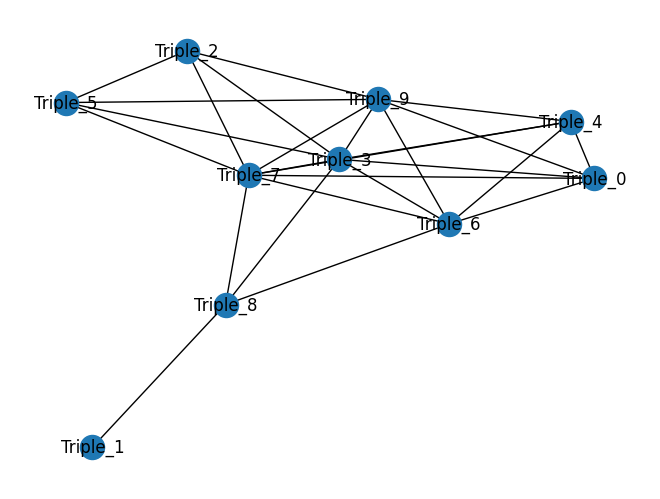

In [53]:
triples = tripless
# Function to calculate cosine similarity
def calculate_similarity(str1, str2):
    vectorizer = CountVectorizer().fit([str1, str2])
    vec1 = vectorizer.transform([str1]).toarray()
    vec2 = vectorizer.transform([str2]).toarray()
    return cosine_similarity(vec1, vec2)[0][0]

# Add triple-nodes to the graph
G = nx.Graph()
triple_nodes = {}
for i, triple in enumerate(triples):
    node_id = f"Triple_{i}"
    triple_nodes[node_id] = triple
    G.add_node(node_id, triple=triple)

# Connect triples based on contextual similarity
similarity_threshold = 0.5  # Define a threshold for similarity
for node_id1, triple1 in triple_nodes.items():
    for node_id2, triple2 in triple_nodes.items():
        if node_id1 != node_id2:
            # Perform Cartesian product comparison for all components
            for part1, part2 in itertools.product(triple1, triple2):
                if calculate_similarity(part1, part2) > similarity_threshold:
                    G.add_edge(node_id1, node_id2)
                    break  # Exit loop if any component pair is similar

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [60]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Load the spaCy model
nlp = spacy.load("en_core_web_md")

# Function to calculate cosine similarity using spaCy
def calculate_similarity(str1, str2):
    doc1 = nlp(str1)
    doc2 = nlp(str2)
    return doc1.similarity(doc2)

# Your triples and graph initialization remains the same
triples = tripless
G = nx.Graph()
triple_nodes = {}
for i, triple in enumerate(triples):
    node_id = f"Triple_{i}"
    triple_nodes[node_id] = triple
    G.add_node(node_id, triple=triple)

# Connect triples based on contextual similarity
similarity_threshold = 0.5
for node_id1, triple1 in triple_nodes.items():
    for node_id2, triple2 in triple_nodes.items():
        if node_id1 != node_id2:
            for part1, part2 in itertools.product(triple1, triple2):
                if calculate_similarity(part1, part2) > similarity_threshold:
                    G.add_edge(node_id1, node_id2)
                    break

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.

In [45]:
# print the graph as a list of edges
print(G.edges())

# print the triple nodes
display(triple_nodes)

[('Triple_0', 'Triple_2'), ('Triple_0', 'Triple_4'), ('Triple_0', 'Triple_6'), ('Triple_0', 'Triple_7'), ('Triple_0', 'Triple_9'), ('Triple_1', 'Triple_8'), ('Triple_2', 'Triple_3'), ('Triple_2', 'Triple_4'), ('Triple_2', 'Triple_5'), ('Triple_2', 'Triple_6'), ('Triple_2', 'Triple_7'), ('Triple_2', 'Triple_8'), ('Triple_2', 'Triple_9'), ('Triple_3', 'Triple_5'), ('Triple_3', 'Triple_7'), ('Triple_3', 'Triple_9'), ('Triple_4', 'Triple_6'), ('Triple_4', 'Triple_7'), ('Triple_4', 'Triple_9'), ('Triple_5', 'Triple_7'), ('Triple_5', 'Triple_9'), ('Triple_6', 'Triple_7'), ('Triple_6', 'Triple_8'), ('Triple_6', 'Triple_9'), ('Triple_7', 'Triple_8'), ('Triple_7', 'Triple_9')]


{'Triple_0': ('TechCorp', 'be', 'located-in-Silicon-Valley'),
 'Triple_1': ('New-York', 'know', 'its-vibrant-technology-sector'),
 'Triple_2': ('Bob', 'be-in', 'love-with-Alice'),
 'Triple_3': ('Alice', 'hate', 'her-work'),
 'Triple_4': ('TechCorp', 'be', 'a-technology-company'),
 'Triple_5': ('Alice', 'work-as', 'engineer'),
 'Triple_6': ('Bob', 'work-at', 'TechCorp'),
 'Triple_7': ('Bob', 'be', 'a-colleague-of-Alice'),
 'Triple_8': ('Bob', 'attend', 'a-conference-in-New-York-last-month'),
 'Triple_9': ('Alice', 'work-at', 'TechCorp')}

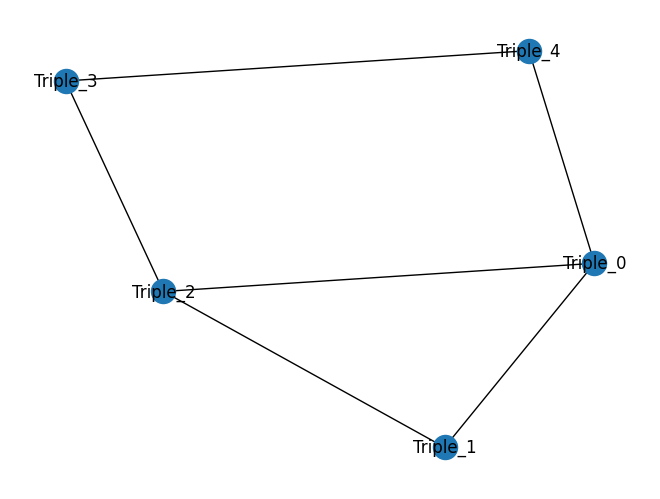

In [3]:
# Function to calculate cosine similarity
def calculate_similarity(str1, str2):
    vectorizer = CountVectorizer().fit([str1, str2])
    vec1 = vectorizer.transform([str1]).toarray()
    vec2 = vectorizer.transform([str2]).toarray()
    return cosine_similarity(vec1, vec2)[0][0]

# Example triples
triples = [('Paris', 'isCapitalOf', 'France'), ('Berlin', 'isCapitalOf', 'Germany'), ('Delhi', 'isCapitalOf', 'India'), ('Kholi', 'isFrom', 'Delhi'), ('Mbappe', 'isFrom', 'Paris')]
G = nx.Graph()

# Add triple-nodes to the graph
triple_nodes = {}
for i, triple in enumerate(triples):
    node_id = f"Triple_{i}"
    triple_nodes[node_id] = triple
    G.add_node(node_id, triple=triple)

# Connect triples based on contextual similarity
similarity_threshold = 0.5  # Define a threshold for similarity
for node_id1, triple1 in triple_nodes.items():
    for node_id2, triple2 in triple_nodes.items():
        if node_id1 != node_id2:
            # Perform Cartesian product comparison for all components
            for part1, part2 in itertools.product(triple1, triple2):
                if calculate_similarity(part1, part2) > similarity_threshold:
                    G.add_edge(node_id1, node_id2)
                    break  # Exit loop if any component pair is similar

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()
